In [1]:
import os
os.chdir("C:/Users/patil/Downloads/Bank_loan-master")

In [2]:
from ggplot import *

In [3]:
# check current working directory 
os.getcwd()

'C:\\Users\\patil\\Downloads\\Bank_loan-master'

In [4]:
import pandas as pd

In [5]:
pd.DataFrame(os.listdir(os.getcwd()))  

,0
0,.ipynb_checkpoints
1,.RData
2,.Rhistory
3,Aftr_bank_Normalized.csv
4,bank-loan.csv
5,bank_c50Rules.txt
6,Bank_loan-master
7,BoxPlot_grid.arrange_of debtinc & crreddebt (2...
8,BoxPlot_grid.arrange_of debtinc & crreddebt (3...
9,BoxPlot_grid.arrange_of debtinc & crreddebt (4...


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

In [7]:

from fancyimpute import KNN  # for all KNN family operations

Using TensorFlow backend.


In [8]:
bank = pd.read_csv("bank-loan.csv")

In [9]:
list (bank.columns)

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [10]:
bank.head(5).describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,34.60000,1.600000,11.800000,9.20000,82.000000,10.460000,3.604765,3.011235,0.400000
std,8.38451,0.894427,6.058052,6.09918,64.276745,6.645901,4.385097,1.618346,0.547723
min,24.00000,1.000000,2.000000,0.00000,28.000000,2.900000,0.856075,0.821280,0.000000
25%,27.00000,1.000000,10.000000,6.00000,31.000000,5.500000,1.362202,2.168925,0.000000
50%,40.00000,1.000000,15.000000,12.00000,55.000000,9.300000,1.787436,3.056564,0.000000
75%,41.00000,2.000000,15.000000,14.00000,120.000000,17.300000,2.658720,4.000798,1.000000
max,41.00000,3.000000,17.000000,14.00000,176.000000,17.300000,11.359392,5.008608,1.000000


In [11]:
bank.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [12]:
bank.tail(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [14]:

bank.shape

(850, 9)

In [15]:
bank.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


1. debtinc = Individuals debt payment to his gross income
2. creddebt = Debt-to-credit ratio, is a measurement of hoe much you owe your creditors as % of your available credit (credit Limits)

In [17]:

# it means there are missing values in var

bank['default'].unique()

array([ 1.,  0., nan])

In [18]:
bank['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [19]:
(850-530-133) # nan values

187

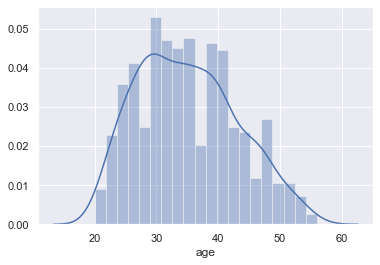

In [16]:
############ univariate analysis and bivariate analysis ##########################

#Analysis for single variable in the dataset is Univariate Analysis and plotting relation between 2 variables is bivariate analysis.

sns.distplot(bank["age"], kde = True , bins = 20)


C:\Users\patil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\patil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\patil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\patil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


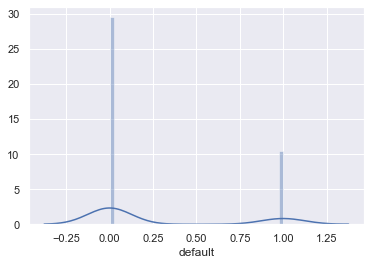

In [20]:
sns.distplot(bank["default"], kde = True , bins = 40)

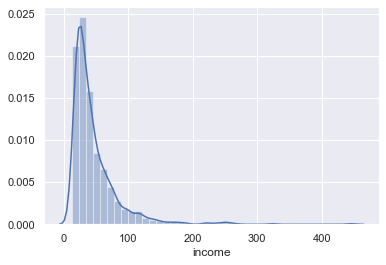

In [21]:
sns.distplot(bank["income"], kde = True , bins = 40)

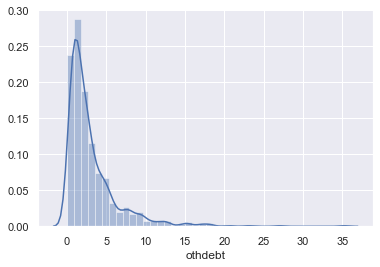

In [22]:
sns.distplot(bank["othdebt"], kde = True , bins = 40)

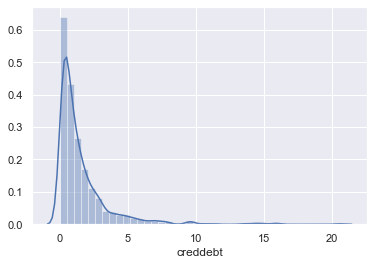

In [23]:
sns.distplot(bank["creddebt"], kde = True , bins = 40)

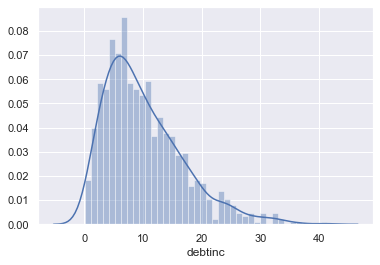

In [24]:
sns.distplot(bank["debtinc"], kde = True , bins = 40)

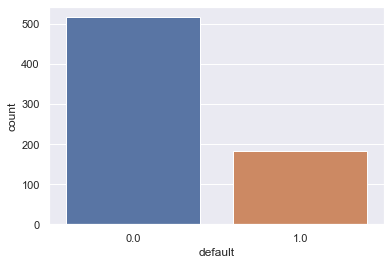

In [25]:
sns.countplot( x = "default" , data = bank,)

1= defaulter , 0 = NonDefaulter

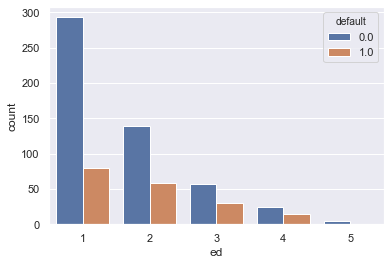

In [26]:
sns.countplot( x = "ed" , data = bank, hue = "default")

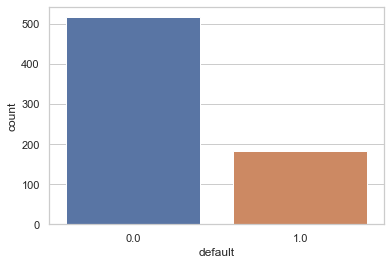

In [27]:
sns.set_style("whitegrid")
sns.countplot( x = "default" , data = bank)

In [28]:
############# missing value analysis ################

#Calculating the null values in the dataframe
missing_value = pd.DataFrame(bank.isnull().sum())

missing_value = (missing_value/len(bank))*100
missing_value.reset_index(drop=True)

missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Arranging Missing Values in Decreasing Order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index()
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#save output results 
missing_value.to_csv("Missing_perc.csv", index = False)
missing_value

,Variables,Missing_percentage
0,default,17.647059
1,age,0.000000
2,ed,0.000000
3,employ,0.000000
4,address,0.000000
5,income,0.000000
6,debtinc,0.000000
7,creddebt,0.000000
8,othdebt,0.000000


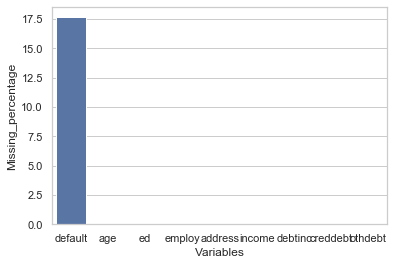

In [29]:
# Bar Graph for missing values

sns.barplot( x='Variables', y='Missing_percentage', data = missing_value)

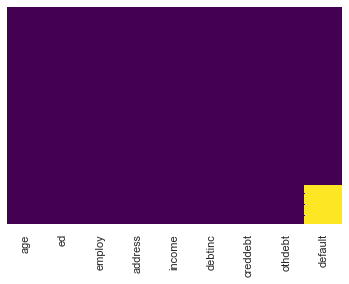

In [30]:
sns.heatmap(bank.isnull(), yticklabels=False,cbar=False,cmap="viridis")

In [31]:
bank.isnull().sum().sort_values( ascending = False)

default     150
othdebt       0
creddebt      0
debtinc       0
income        0
address       0
employ        0
ed            0
age           0
dtype: int64

### Impute Missing Values wiith different methods

In [32]:
bank.default.head(5)

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: default, dtype: float64

In [33]:
bank.default.unique()

array([ 1.,  0., nan])

In [34]:
bank['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

#### Implement Mode imputation

In [35]:
# #fill that nan with MODE Method,
# Mode is the score that occurres most frequesntly in data var,
# So frequent occured no. in variable is '0' ( Ocuured 517 times), so will replace "NA" by '0'

bank['default'].loc[4]=np.nan         #replacing that locations value (=1) with NA

bank['default'] = bank['default'].fillna(0)       #fill that nan with Mode method

bank['default'].loc[4]

C:\Users\patil\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0.0

In [36]:
bank['default'].isnull().sum()
bank['default'].value_counts()


0.0    668
1.0    182
Name: default, dtype: int64

In [37]:
bank.default.unique()

array([1., 0.])


KNN imputation= Distance based method = fractional values = Cannot use

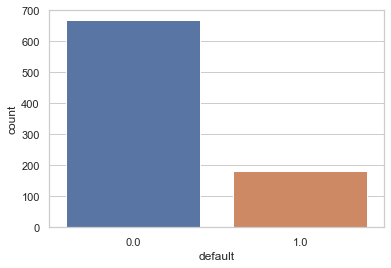

In [38]:
sns.countplot( x = "default" , data = bank,)


## Outliers Analysis n Synthesis


In [39]:
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20fdcb64108>,
 'caps': [<matplotlib.lines.Line2D at 0x20fdcb6b308>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fdcb55508>],
 'medians': [<matplotlib.lines.Line2D at 0x20fdcb70288>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fdcb70a48>],
 'means': []}

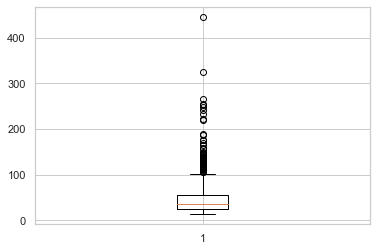

In [40]:
     # Plot Box Plot to see outliers using MatplotLib
    
%matplotlib inline

plt.boxplot(bank['income'])  

In [41]:
#Since Box_Plot is applied on continuos variable.


C:\Users\patil\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


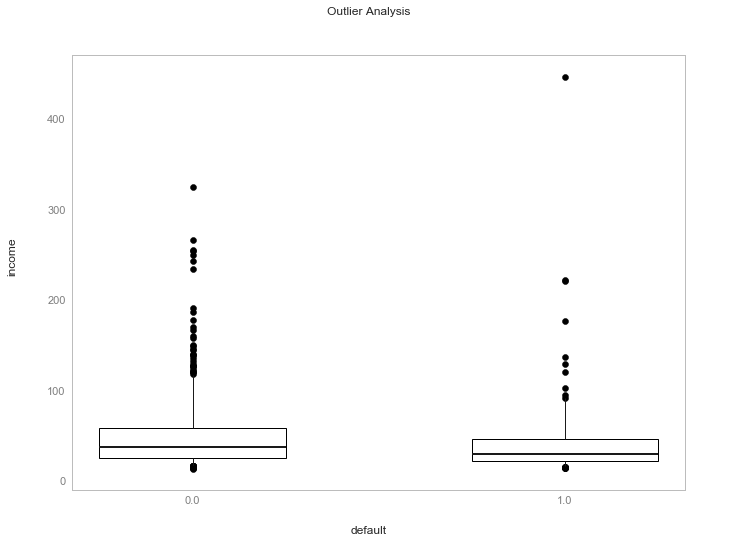

<ggplot: (-9223371895157841540)>

In [42]:
##Box plot by ggplot
ggplot(bank, aes(x = 'default', y = 'income', fill = 'default')) +\
    geom_boxplot(fill = 'default')+ theme_bw() + xlab("default") + ylab("income") +\
    ggtitle("Outlier Analysis") +\
    theme(text=element_text(size=30))

C:\Users\patil\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


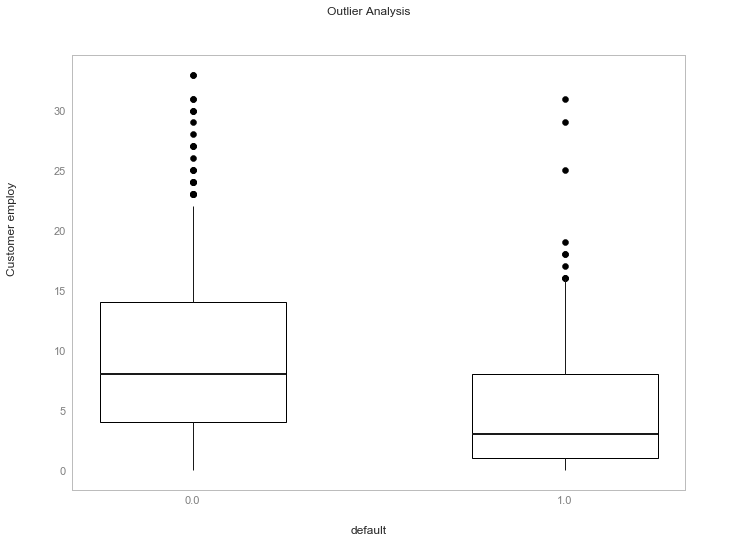

<ggplot: (-9223371895157817120)>

In [43]:
##Box plot
ggplot(bank, aes(x = 'default', y = 'employ', fill = 'default')) +\
    geom_boxplot(fill = 'default')+ theme_bw() + xlab("default") + ylab("Customer employ") +\
    ggtitle("Outlier Analysis") +\
    theme(text=element_text(size=60))

### It means there are Outliers present in data, lets look into it

In [44]:
bank.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

#### As we can see above, variables__ 'ed' __and__ 'default'__ are only categorical variables, so lets convert them to factor dtype

In [45]:

bank['ed'] = pd.Categorical(bank['ed'])
print(bank.ed.dtype)

bank['default'] = pd.Categorical(bank['default'])
print(bank.default.dtype)

#print(marketing_train[[i]])
#marketing_train.iloc[:,i]=marketing_train.iloc[:,i].cat.codes

category
category


 ##### Now apply outlier analysis on Numerical variables # and Chi-S

### Exp.1) Detect and delete outliers from data = NAs
### Exp.2)..Replace those by NAs  by KNN imputation

In [46]:
#Now save numeric variables

cnames= ["age","employ","address","income","debtinc","creddebt","othdebt"]

#### As you can see that , our data has only 850 observations, n above all if we apply 1st experiment (Detect and Delete outliers) on it , then our data will get shrink further.
#### and that can be huge loss of information, so  instead of it we will simply replace those outliers by KNN imputation to exclude loss of information

### Now detect and replace Outliers 

In [47]:
bank.shape

(850, 9)

In [48]:
bank.head(4)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20fdcccce08>,
 'caps': [<matplotlib.lines.Line2D at 0x20fdccd0f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fdccb41c8>],
 'medians': [<matplotlib.lines.Line2D at 0x20fdccd5f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fdccd9848>],
 'means': []}

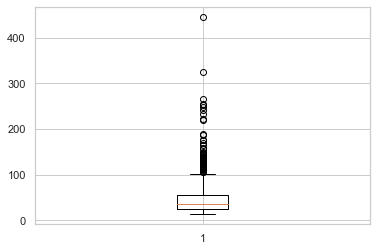

In [49]:
    
%matplotlib inline

plt.boxplot(bank['income'])  

In [50]:
# 2.Detect and replace  NA  n later impute by KNN imputation

#Extract quartiles
q75, q25 = np.percentile(bank['income'], [75 ,25])

#Calculate IQR
iqr = q75 - q25

#Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

#Replace with NA
bank.loc[bank['income']  < minimum,:'income'] = np.nan

bank.loc[bank['income'] > maximum,:'income'] = np.nan

#Calculate missing value
bank.income.isnull().sum()

# missing_val = pd.DataFrame(bank.isnull().sum())

53

In [51]:

#           Impute whole Bank's outliers with KNN Imputation

bank = pd.DataFrame(KNN(k = 3).fit_transform(bank), columns = bank.columns)



Imputing row 1/850 with 5 missing, elapsed time: 0.172
Imputing row 101/850 with 5 missing, elapsed time: 0.174
Imputing row 201/850 with 0 missing, elapsed time: 0.174
Imputing row 301/850 with 5 missing, elapsed time: 0.176
Imputing row 401/850 with 0 missing, elapsed time: 0.178
Imputing row 501/850 with 0 missing, elapsed time: 0.180
Imputing row 601/850 with 0 missing, elapsed time: 0.182
Imputing row 701/850 with 0 missing, elapsed time: 0.184
Imputing row 801/850 with 0 missing, elapsed time: 0.186


In [52]:
#bank['ed'].isnull().sum()
bank.default.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x20fdcd41e08>,
 'caps': [<matplotlib.lines.Line2D at 0x20fdcd3ab48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fdcd1d208>],
 'medians': [<matplotlib.lines.Line2D at 0x20fdcd34648>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fdcd34dc8>],
 'means': []}

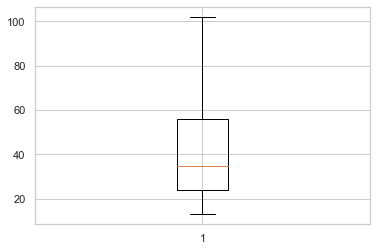

In [53]:
    ## Now check outliers got imputed or not 
%matplotlib inline

plt.boxplot(bank['income']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x20fdcd98f08>,
 'caps': [<matplotlib.lines.Line2D at 0x20fdcd9ff88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fdcd75208>],
 'medians': [<matplotlib.lines.Line2D at 0x20fdcda3f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fdcda6848>],
 'means': []}

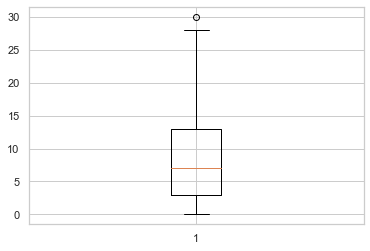

In [54]:
    ## Now check outliers got imputed or not 
%matplotlib inline

plt.boxplot(bank['employ']) 

In [55]:
bank.income.isnull().sum()

0

In [56]:
bank.default.value_counts()

0.0    668
1.0    182
Name: default, dtype: int64

## Data Visualizations

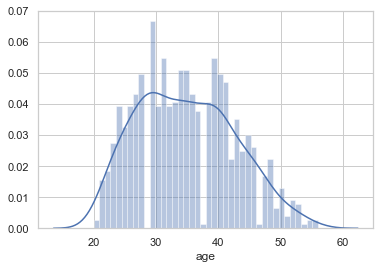

In [57]:
sns.distplot(bank["age"], kde = True , bins = 40)

<Figure size 1440x720 with 0 Axes>

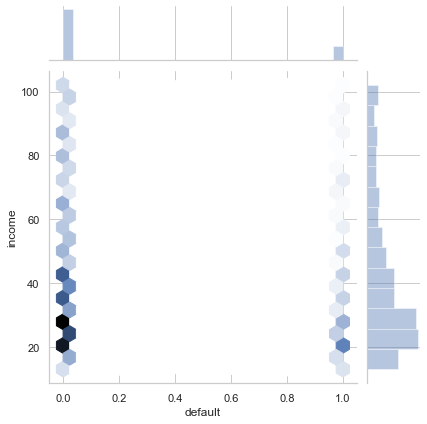

In [58]:

# -Jointplots for Bivariate Analysis.
# -Here Scatter plot has regression line between 2 variables along with separate Bar plots of both variables.
plt.figure(figsize=(20,10))
_ = sns.jointplot(x='default',y='income', data=bank, kind = 'hex')


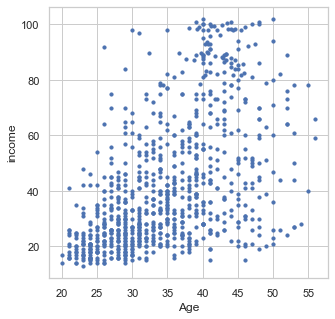

In [59]:
# Relationship beetween number of cutermors and income

plt.figure(figsize=(5,5))
plt.scatter(x=bank['age'], y=bank['income'], s=10)
plt.xlabel('Age')
plt.ylabel('income')
plt.show()

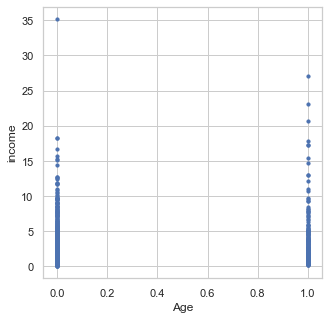

In [60]:
# Relationship beetween number of default and othdebt

plt.figure(figsize=(5,5))
plt.scatter(x=bank['default'], y=bank['othdebt'], s=10)
plt.xlabel('Age')
plt.ylabel('income')
plt.show()

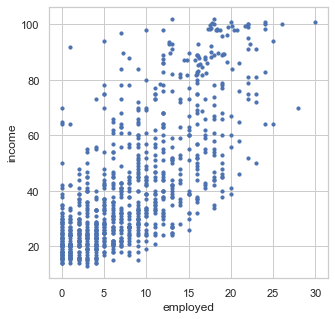

In [61]:
# Relationship beetween number of cutermors and income

plt.figure(figsize=(5,5))
plt.scatter(x=bank['employ'], y=bank['income'], s=10)
plt.xlabel('employed')
plt.ylabel('income')
plt.show()

In [62]:
bank.head(2)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,32.356193,2.960641,7.236156,2.601503,89.801565,9.3,11.359392,5.008608,1.0
1,27.000000,1.000000,10.000000,6.000000,31.000000,17.3,1.362202,4.000798,0.0


#### As of now we got data having zero missing values and Outliers

# Next step = Feature Selection

#### Selection of categorical vars -- Chi_Sqr Test of Independance

#### Selection of Nemerical vars i.e. ( cnames ) --  Correlation analysis 


In [63]:
cnames

['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [64]:
df_corr = bank.loc[:,cnames]
df_corr.head(2)

,age,employ,address,income,debtinc,creddebt,othdebt
0,32.356193,7.236156,2.601503,89.801565,9.3,11.359392,5.008608
1,27.000000,10.000000,6.000000,31.000000,17.3,1.362202,4.000798


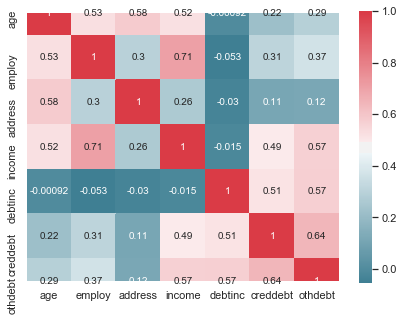

In [65]:
#Set the width and hieght of the correlation plot

f, ax = plt.subplots(figsize = (7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax , annot = True )

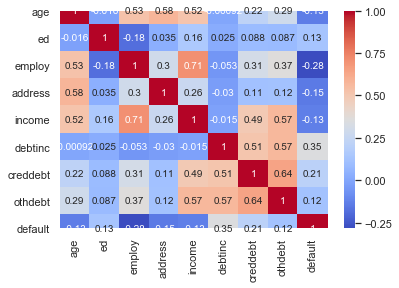

In [66]:

df_1 = bank.corr()
sns.heatmap(df_1 , annot = True , cmap = "coolwarm")

#### As u can see above in plot, no any variable is identical to other var, it means these vars are no hiighly correlated variables,  so we have to carry all variables and we will put all of them in model developement as all vars are imp right now.

#### #Chisquare test of independence , for select categorical vars

#Save categorical variables

In [67]:
bank.dtypes

age         float64
ed          float64
employ      float64
address     float64
income      float64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

#### As we can see above, variables__ 'ed' __and__ 'default'__ are only categorical variables, so lets convert them to factor dtype

In [68]:

bank['ed'] = pd.Categorical(bank['ed'])
print(bank.ed.dtype)

bank['default'] = pd.Categorical(bank['default'])
print(bank.default.dtype)

#print(marketing_train[[i]])
#marketing_train.iloc[:,i]=marketing_train.iloc[:,i].cat.codes

category
category


In [69]:
bank.dtypes

age          float64
ed          category
employ       float64
address      float64
income       float64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [70]:
cat_names = ["ed"]

In [71]:
from scipy.stats import chi2_contingency  # for chi-sqr test and comtingency table

In [72]:
#loop for chi square values   # p = 0.05,  if p < 0.05, Reject Null hyp., Consider that var

from scipy.stats import chi2_contingency  # for chi-sqr test and comtingency table

for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bank['default'], bank[i]))
    print(p)

ed
0.6020768720464953


 As we can, see , p Value of cat var (ed) is > 0.05 , It means We Accept Null Hhypothesis saying that these two variables are , not imp to each other, n we can drop any one of them instead of carrying both same vars.

In [73]:
                #  Now remove less important features  / Diamension reduction

bank = bank.drop(['ed'], axis=1)

In [74]:
bank.head(2)

,age,employ,address,income,debtinc,creddebt,othdebt,default
0,32.356193,7.236156,2.601503,89.801565,9.3,11.359392,5.008608,1.0
1,27.000000,10.000000,6.000000,31.000000,17.3,1.362202,4.000798,0.0


# Feature Scaling 
## scale tht imp features in measurable units
### ___1) Scaling by Normalization
### __or_2) Scaling by Standardization

In most data sets, we will have features with highly varying range, units and magnitudes. Features with greater magnitudes will carry a greater vaule than those with low magnitudes. To nullify this effect, feature scaling is performed.

(array([ 28.,  51.,  88.,  89.,  72., 100.,  73.,  99.,  77.,  47.,  60.,
         30.,  18.,  13.,   5.]),
 array([20. , 22.4, 24.8, 27.2, 29.6, 32. , 34.4, 36.8, 39.2, 41.6, 44. ,
        46.4, 48.8, 51.2, 53.6, 56. ]),
 <a list of 15 Patch objects>)

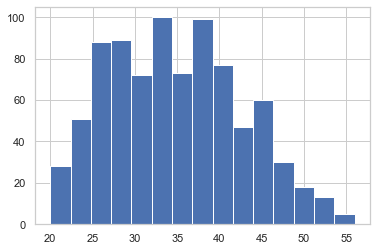

In [75]:
#check Normality by Histogram Before Normalization / Standerdization

%matplotlib inline  
plt.hist(bank['age'], bins='auto')

(array([ 93., 153., 146.,  79.,  80.,  57.,  43.,  32.,  36.,  25.,  25.,
         30.,  20.,  31.]),
 array([ 13.        ,  19.35714286,  25.71428571,  32.07142857,
         38.42857143,  44.78571429,  51.14285714,  57.5       ,
         63.85714286,  70.21428571,  76.57142857,  82.92857143,
         89.28571429,  95.64285714, 102.        ]),
 <a list of 14 Patch objects>)

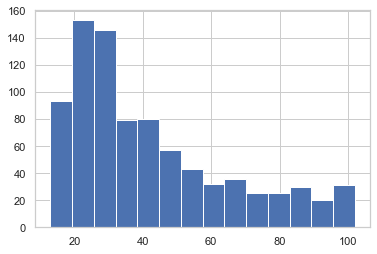

In [76]:
    # Again verify it
    
%matplotlib inline  
plt.hist(bank['income'], bins='auto')

 Since we can see that , data is not normallaly distributed , Hence go for **Normalization** 1st instead of Stdn

In [77]:
cnames = ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']


In [78]:
cnames

['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [79]:
#Nomalisation

for i in cnames:
    print(i)
    bank[i] = (bank[i] - min(bank[i]))/(max(bank[i]) - min(bank[i]))

age
employ
address
income
debtinc
creddebt
othdebt


In [80]:
bank.head(2)

,age,employ,address,income,debtinc,creddebt,othdebt,default
0,0.343228,0.241205,0.083919,0.862939,0.223301,0.552210,0.141188,1.0
1,0.194444,0.333333,0.193548,0.202247,0.417476,0.065719,0.112518,0.0


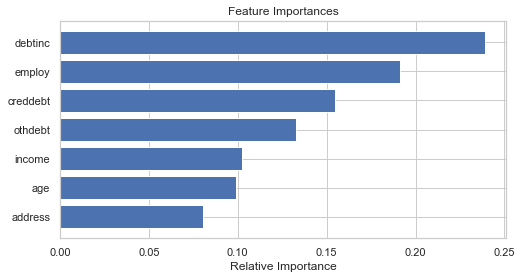

In [137]:
fig, ax = plt.subplots(figsize=(8,4))
features = bank.columns
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Machine Learning
.
.
## Decision_Tree-Classification

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
bank['default']

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
845    0.0
846    0.0
847    0.0
848    0.0
849    0.0
Name: default, Length: 850, dtype: category
Categories (2, float64): [0.0, 1.0]

In [84]:
bank['default'] = bank['default'].astype('int')

In [85]:

bank['default']

0      1
1      0
2      0
3      0
4      0
      ..
845    0
846    0
847    0
848    0
849    0
Name: default, Length: 850, dtype: int32

In [86]:
bank.head(2)

,age,employ,address,income,debtinc,creddebt,othdebt,default
0,0.343228,0.241205,0.083919,0.862939,0.223301,0.552210,0.141188,1
1,0.194444,0.333333,0.193548,0.202247,0.417476,0.065719,0.112518,0


In [87]:
# Now devide the data into train and test

X= bank.values[:,0:7]     #saving all ind var's in X
Y= bank.values[:,7]        #saving 1 dep var in Y

In [88]:
pd.DataFrame(X).head(2)

,0,1,2,3,4,5,6
0,0.343228,0.241205,0.083919,0.862939,0.223301,0.552210,0.141188
1,0.194444,0.333333,0.193548,0.202247,0.417476,0.065719,0.112518


In [89]:
pd.DataFrame(Y).head(2)

,0
0,1.0
1,0.0


In [90]:
#Now split the data into train and test
   #devided 80% and 20% of ALL var's obs (except 'default' var) in X_train and into X_test Respectively
   #devided 80% and 20% of Dep.Var's obs ( default var's) into y_train and into y_test Respectively

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)


In [91]:
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6
0,0.416667,0.566667,0.129032,0.325843,0.070388,0.003968,0.031895
1,0.250000,0.133333,0.096774,0.269663,0.157767,0.055877,0.035175
2,0.722222,0.200000,0.612903,0.202247,0.293689,0.096053,0.049809
3,0.666667,0.600000,0.000000,0.539326,0.259709,0.136002,0.106279
4,0.500000,0.100000,0.612903,0.112360,0.354369,0.039905,0.071225


In [92]:
pd.DataFrame(X_test).head(5)

,0,1,2,3,4,5,6
0,0.588166,0.672154,0.562746,0.970237,0.184466,0.340156,0.355902
1,0.638889,0.433333,0.741935,0.707865,0.145631,0.104109,0.069393
2,0.555556,0.100000,0.419355,0.112360,0.165049,0.019356,0.032202
3,0.583333,0.300000,0.419355,0.382022,0.118932,0.020701,0.053121
4,0.527778,0.400000,0.322581,0.370787,0.118932,0.026740,0.048169


In [93]:
pd.DataFrame(y_train).head(3)

,0
0,0.0
1,1.0
2,0.0


In [94]:
from random import randrange , uniform 
from sklearn import tree  #for Decision Tree

In [95]:

  
#Now as data is devided , Build your DT_Model on train (X_train =80% excluding dep var) data and after building test your model on test data (X_test=20% ofAll but except dep var )

clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 10, max_depth=5, min_samples_leaf=7 )
clf.fit(X_train,y_train)   # criterion='entropy' for C5.0 and gini for CART statistical aproch


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


Select var as parent Node whose Gini Index is Lower than others, it measures the impurity of the data

In [96]:
#   Now predict new TV on this clf model 

y_pred = clf.predict(X_test)
y_pred.shape

(170,)

In [97]:
X_test.shape

(170, 7)

In [98]:
pd.DataFrame(X_test)   # 20% of ind vars observations

,0,1,2,3,4,5,6
0,0.588166,0.672154,0.562746,0.970237,0.184466,0.340156,0.355902
1,0.638889,0.433333,0.741935,0.707865,0.145631,0.104109,0.069393
2,0.555556,0.100000,0.419355,0.112360,0.165049,0.019356,0.032202
3,0.583333,0.300000,0.419355,0.382022,0.118932,0.020701,0.053121
4,0.527778,0.400000,0.322581,0.370787,0.118932,0.026740,0.048169
...,...,...,...,...,...,...,...
165,0.666667,0.266667,0.580645,0.337079,0.118932,0.026424,0.044086
166,0.444444,0.366667,0.258065,0.404494,0.029126,0.012698,0.009069
167,0.694444,0.266667,0.806452,0.157303,0.060680,0.019654,0.006851
168,0.083333,0.100000,0.129032,0.235955,0.104369,0.012171,0.033814


In [99]:

#Create dot file to visualise tree  #http://webgraphviz.com/

dotfile = open("pt.dot", 'w')

df = tree.export_graphviz(clf, out_file=dotfile)

#### Error metrics - Classification type
### Evaluate Model Performance

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
CM =  confusion_matrix(y_test, y_pred)
CM

array([[116,  18],
       [ 22,  14]], dtype=int64)

In [102]:
# OR
CM = pd.crosstab(y_test,y_pred)

#Assign values to parameters
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]


CM

col_0,0.0,1.0
row_0,,
0.0,116,18
1.0,22,14


In [103]:
# % Accuracy

accuracy_score (y_test,y_pred)*100

76.47058823529412

In [104]:
# OR

((TP+TN)*100 / (TP+TN+FP+FN)) 

76.47058823529412

In [105]:
# FNR
(FN*100) / (FN+TP)

61.111111111111114

In [106]:
# Recall
(TP*100) / (FN+TP)

38.888888888888886

In [107]:
print(classification_report( y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       134
         1.0       0.44      0.39      0.41        36

    accuracy                           0.76       170
   macro avg       0.64      0.63      0.63       170
weighted avg       0.76      0.76      0.76       170



precision = tp/(actual results) ie = tp/(tp+fp),______ recall/tpr/sensivity = tp/(pred. results) ie  = tp/(tp+fn)
.__________F1 Score = 2*(Recall * Precision) / (Recall + Precision). . support

In [108]:
dt_pred1 = clf.predict_proba(X_test)[:,1]

# pd.DataFrame(dt_pred1)


In [109]:
pd.DataFrame(dt_pred1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 1 columns):
0    170 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


In [110]:

precision_dc, recall_dc, thresholds_dc = precision_recall_curve(y_test, y_pred)
fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test, y_pred)

# Random forest


In [111]:
clf_rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
clf_rf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

 The random_state parameter allows controlling these random choices so as we dont get repeated results again n again.

In [112]:
# Now lets apply this Model on Test data n predict new TV

y_pred_rf = clf_rf.predict(X_test) 
y_pred_rf

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [113]:
# build Conf. Matrix for predicted TVs evaluation

CM = pd.crosstab(y_test, y_pred_rf )       # compairing both dep var  (original + predicted) then Map conf. Matrix
CM

col_0,0.0,1.0
row_0,,
0.0,125,9
1.0,23,13


In [114]:
#Assign this Conf Matrix values to parameters

TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]


In [115]:
# % Accuracy
# or     ((TP+TN)*100 / (TP+TN+FP+FN)) 

accuracy_score (y_test, y_pred_rf)*100          # DT accuracy_score was = 75 %

81.17647058823529

In [116]:
# FNR      from Dec Tree FNR = 61 %
(FN*100) / (FN+TP)       

63.888888888888886


#### TRY ONCE BY INCREASING NO OF TREES =500

In [117]:

clf_rf = RandomForestClassifier(n_estimators = 500, random_state=42).fit(X_train, y_train)
clf_rf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [118]:
# Now lets apply this Model on Test data n predict new TV

RF_predictions = clf_rf.predict(X_test) 
RF_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [119]:
# build Conf. Matrix for revised models evaluation

CM = pd.crosstab(y_test, RF_predictions )       # compairing both dep var  (original + predicted) then Map conf. Matrix
CM

col_0,0.0,1.0
row_0,,
0.0,125,9
1.0,22,14


In [120]:
#Assign this Conf Matrix values to parameters

TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]


In [121]:
# % Accuracy
# or     ((TP+TN)*100 / (TP+TN+FP+FN)) 

accuracy_score (y_test, RF_predictions)*100          # RF with 100 DT accuracy_score was = 80 %

81.76470588235294

In [122]:
# FNR      from RF with 100 DT FNR = 66.55 %
(FN*100) / (FN+TP)       

61.111111111111114

In [123]:
# Evaluate a score by cross-validation

cv_scores = cross_val_score(clf_rf, X_train, y_train, cv = 5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


Average 5-Fold CV Score: 0.7808823529411764


In [124]:

cv_scores = cross_val_score(clf_rf, X_train, y_train, cv = 5, scoring = 'roc_auc')
print("Average 5-Fold CV Score using ROC scoring: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score using ROC scoring: 0.8120926796344378


##### DT Acc=  75 , FNR =61 %
##### RF Acc(100 Tree)  = 80, fnr = 78
##### RF Acc(500 Tree)  = 81.76 % , fnr =61.11 %
##### SO BY INCREASING NO OF TREES =500, ACCURACY INCREASED AND  FNR DECREASED , 
**SO NOW AUTO-TUNE, N CHECK HOW MANY TREES WILL BE BEST FOR BEST ACCURACY** 

In [164]:
# Cross validation with Auto tuned Parameters

n_space = np.array([5, 6, 10, 12, 15, 50, 100, 200, 500])
criterion_vals = ['gini', 'entropy']
max_features_vals = ['auto', 'sqrt', 'log2']
min_samples_leaf_sp = [1,5,10,25,50]
bootstrap_sp = [True, False]


param_grid = {'n_estimators': n_space, 'criterion' : criterion_vals, 
              'max_features':max_features_vals, 'min_samples_leaf': min_samples_leaf_sp, 
              'bootstrap': bootstrap_sp}




Select var as parent Node whose Gini Index is Lower than others, it measures the impurity of the data.___ Entrophy is Uncertainity/impurity in the data.

In [126]:
rf_clf_tuning = GridSearchCV(clf_rf, param_grid, cv=5)


In [127]:
# Now out of above provided all data , now u (model) tell me, By which of above parametrs I will get Maximmum Accuracy and Minimum FNR
# therefore Auto Tune yourself n generate those Best fitted parameters for RF model



#  rf_clf_tuning.fit(X_train, y_train)


In [129]:
# print("Tuned RF Parameters: {}".format(rf_clf_tuning.best_params_)) 
# print("Best score is {}".format(rf_clf_tuning.best_score_))

#### Now use these Auto tuned parametrs to check increase Accuracy and reduce FNR,

In [130]:
best_rf_clf = RandomForestClassifier(criterion = 'gini', bootstrap = True, 
                                     max_features = 'log2', min_samples_leaf = 5, n_estimators = 200)

In [131]:
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
y_best_rf_preds = best_rf_clf.predict(X_test)

In [133]:

# Lets ReCalculate cv_score,  
# Previously it was 79.55 %
# n with ROC, it was 80.13, now check it gets increases or not by Auto tuned Prametres 

cv_scores = cross_val_score(best_rf_clf, X_train, y_train, cv = 5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.7911764705882353


In [166]:

# Calculate Accuracy by predicted TV got by Auto-Tuned parameters 

# accuracy_score(y_test, y_best_rf_preds)*100

In [135]:
y_best_rf_probas = best_rf_clf.predict_proba(X_test)[:,1]


In [167]:
# print(classification_report(y_test, (y_best_rf_probas > 0.5).astype(int)))

In [168]:
y_rf_probs = clf_rf.predict_proba(X_test)

In [169]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_best_rf_probas)

In [140]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_best_rf_probas)

# logistic regression

basic approach to classification in supervised learning.

#### Assumptions =
##### that data has no outliers, 
##### there are two classes to be predicted, and that 
##### no two independent variables are highly correlated to each other.

 WE SATISFY ALL OF THE ABOVE ASSUMPTIONS

In [141]:
clf_log = LogisticRegression()

In [142]:
pd.DataFrame(X_train).head(2)

,0,1,2,3,4,5,6
0,0.416667,0.566667,0.129032,0.325843,0.070388,0.003968,0.031895
1,0.250000,0.133333,0.096774,0.269663,0.157767,0.055877,0.035175


In [170]:
# train_scale = scale(X_train)
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [144]:
clf_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

smaller values of C specify stronger
    regularization.

In [145]:
y_log_pred = clf_log.predict(X_test)

In [146]:
accuracy_score(y_test, y_log_pred)

0.8235294117647058

In [147]:
C_space = np.array([0.0001, 0.001, 0.1, 1])

In [148]:
param_grid = {'C': C_space}

In [149]:
clf_log_tuning = GridSearchCV(clf_log, param_grid, cv=5)

In [150]:
clf_log_tuning.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [151]:
print("Tuned Logistic Regression Parameters: {}".format(clf_log_tuning .best_params_)) 
print("Best score is {}".format(clf_log_tuning .best_score_))

Tuned Logistic Regression Parameters: {'C': 1.0}
Best score is 0.7882352941176471


In sci-kit 'C' parameter is inverse of lambda, C = 1/λ

Using Logistic Regression, we achieved a training set accuracy of ~79% (in terms of training set accuracy alone.)

Next, the model will be fit with the best parameter of C and then it will be used to predict the test set.

In [152]:
clf_log = LogisticRegression(C = 1.0)

In [153]:
clf_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_preds = clf_log.predict(X_test)

In [155]:
p_clf_log_ba = clf_log.predict_proba(X_test)

In [156]:
accuracy_score(y_test, y_preds)

0.8235294117647058

In [171]:

print(classification_report(y_test, y_preds))      # In RF (500 Dtrees) Acc = 81 %

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       134
         1.0       0.80      0.22      0.35        36

    accuracy                           0.82       170
   macro avg       0.81      0.60      0.62       170
weighted avg       0.82      0.82      0.78       170



precision = tp/(actual results) ie = tp/(tp+fp), recall/tpr/sensivity = tp/(pred. results) ie  = tp/(tp+fn)
.F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [158]:
precision_lg, recall_lg, thresholds_lg = precision_recall_curve(y_test, p_clf_log_ba[:, 1])

In [159]:
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, p_clf_log_ba[:, 1])

Text(0.5, 1.0, 'Precision vs. Recall curve')

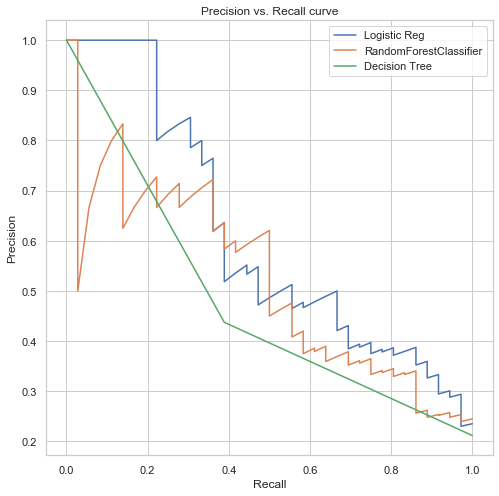

In [160]:
# precision = tp/(actual results) ie = tp/(tp+fp), recall/tpr/sensivity = tp/(pred. results) ie  = tp/(tp+fn)

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(recall_lg, precision_lg)
plt.plot(recall_rf, precision_rf)
plt.plot(recall_dc, precision_dc)
plt.legend(('Logistic Reg', 'RandomForestClassifier', 'Decision Tree'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall curve')

In [161]:
area_log_reg = auc(recall_lg, precision_lg)*100
print(area_log_reg)
area_rf = auc(recall_rf, precision_rf)*100
print(area_rf)
area_dc = auc(recall_dc, precision_dc)*100
print(area_dc)

60.83875689986049
51.61916342718498
47.790032679738566


Text(0.5, 1.0, 'ROC Curves')

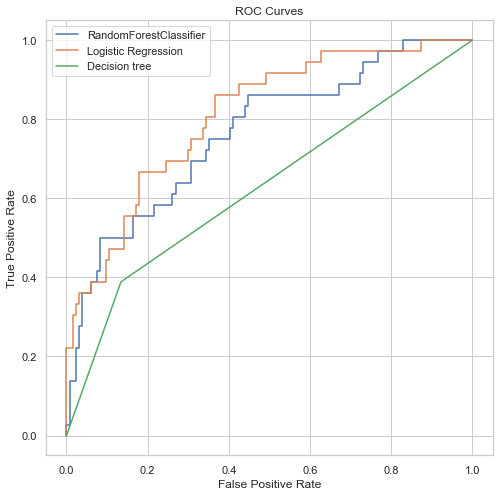

In [162]:
#Receiver Operating Characteristic curve
#True-positive rate is also known as sensitivity, recall or probability of detection in machine
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_lg, tpr_lg)
plt.plot(fpr_dc, tpr_dc)
plt.legend(('RandomForestClassifier','Logistic Regression' , 'Decision tree'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

In [163]:
Areas_ROC_decision = roc_auc_score(y_test, dt_pred1)
Areas_ROC_logistic  = roc_auc_score(y_test, p_clf_log_ba[:, 1])
Areas_ROC_randomforest = roc_auc_score(y_test, y_best_rf_probas)
print(Areas_ROC_decision)
print(Areas_ROC_logistic)
print(Areas_ROC_randomforest)

0.6631426202321725
0.8094941956882256
0.7651326699834163


 When AUC is 0.82, it means there is 82% chance that model will be able to distinguish between positive class and negative class.


## As you can see most of the area is covered by Logistic Regression , Also Precision Vs Recall curve of  Logistic Regression is higher than all others ,
.
## Hence we will select Logistic Regression model
